In [2]:
from PIL import Image
from scipy.ndimage.filters import convolve
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from skimage.morphology import erosion, dilation

C:\Users\T R N V A N M A N H\AppData\Local\Temp\ipykernel_10740\3011429740.py:2: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


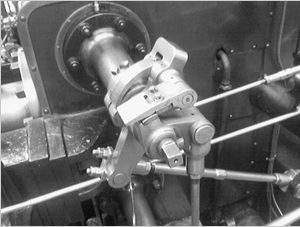

In [3]:
image = Image.open('./engine.png').convert('L')
image

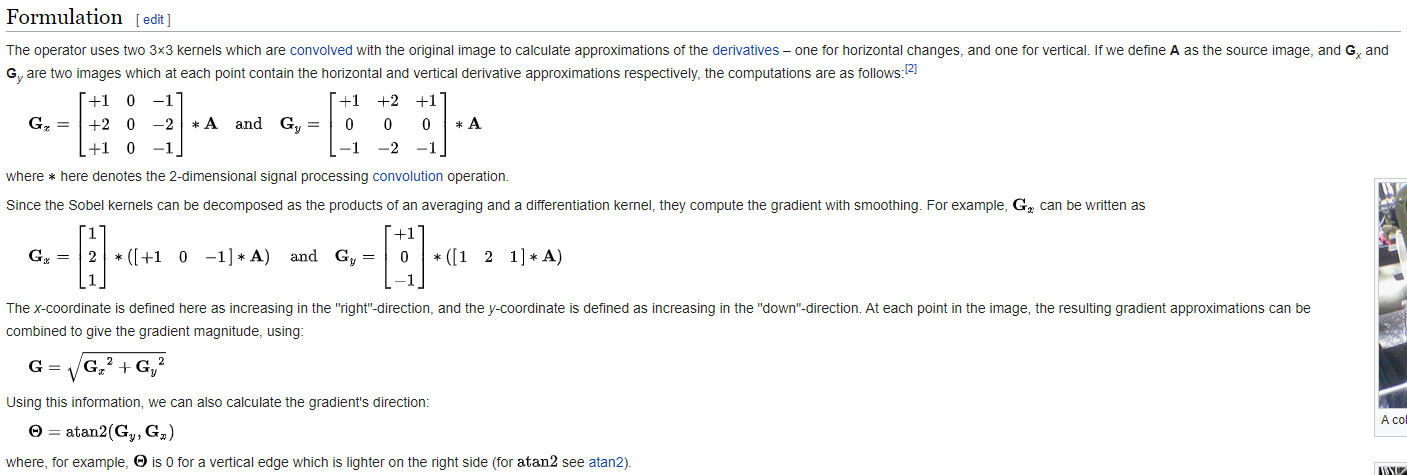

In [17]:
# Sobel filter
def sobel_edge_detect(image):
    sobel_x = np.array([[1, 0, -1], [2, 0 ,-2], [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1], [0, 0 ,0], [-1, -2, -1]])
    image_x = signal.convolve2d(image, sobel_x)
    plt.figure(dpi=170)
    plt.subplot(1, 3, 1)
    plt.imshow(image_x, cmap='gray')
    image_y = signal.convolve2d(image, sobel_y)
    plt.subplot(1, 3, 2)
    plt.imshow(image_y, cmap='gray')
    edge_detected = np.sqrt(np.square(image_x) + np.square(image_y))
    plt.subplot(1, 3, 3)
    plt.imshow(edge_detected, cmap='gray')
    return edge_detected

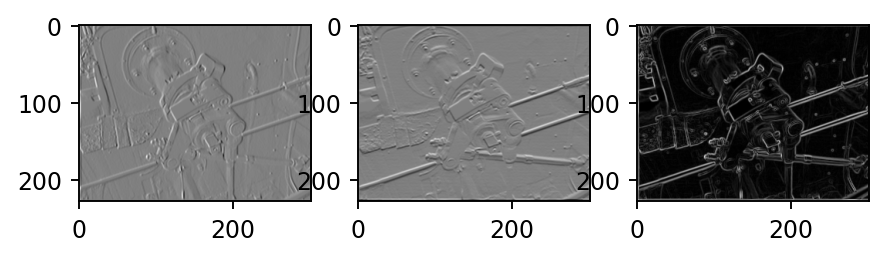

In [18]:
image = Image.open('./engine.png').convert('L')
image_edge_detected = sobel_edge_detect(image)

In [19]:
def gaussian_filter(kerlen=21, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kerlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d

In [20]:
gauss_filter = gaussian_filter(5, 3)
gauss_filter

array([[0.00119581, 0.0082413 , 0.01561284, 0.0082413 , 0.00119581],
       [0.0082413 , 0.05679776, 0.10760126, 0.05679776, 0.0082413 ],
       [0.01561284, 0.10760126, 0.20384662, 0.10760126, 0.01561284],
       [0.0082413 , 0.05679776, 0.10760126, 0.05679776, 0.0082413 ],
       [0.00119581, 0.0082413 , 0.01561284, 0.0082413 , 0.00119581]])

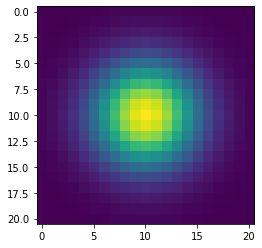

In [21]:
plt.imshow(gaussian_filter(21, 3))

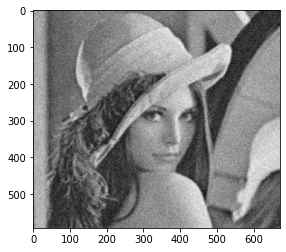

In [22]:
noise_image = Image.open('./gauss_nois_image.png').convert('L')
plt.imshow(noise_image, cmap='gray')

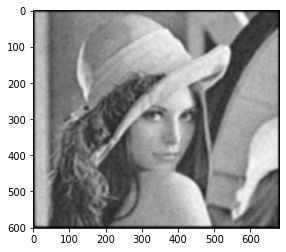

In [23]:
remove_noise_img = signal.convolve2d(noise_image, gaussian_filter(10, 2))
plt.imshow(remove_noise_img, cmap='gray')

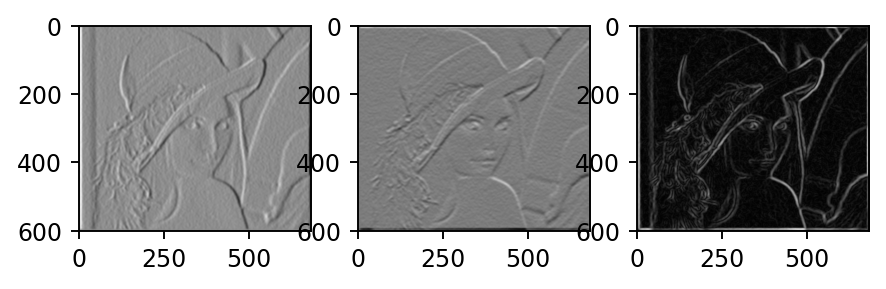

In [27]:
blured_image = sobel_edge_detect(remove_noise_img)
# plt.imshow(blured_image, cmap='gray')

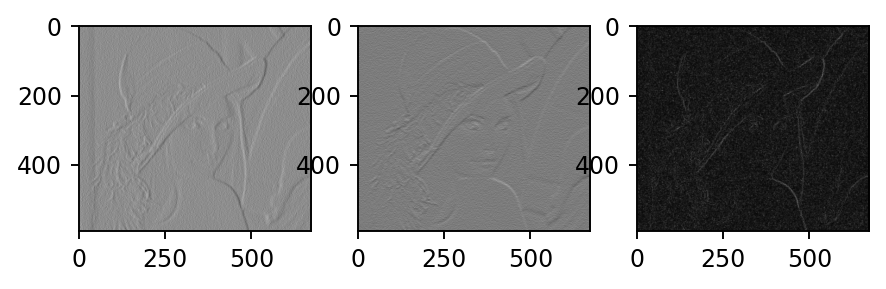

In [29]:
edge_detect = sobel_edge_detect(noise_image)
# plt.imshow(edge_detect, cmap='gray')

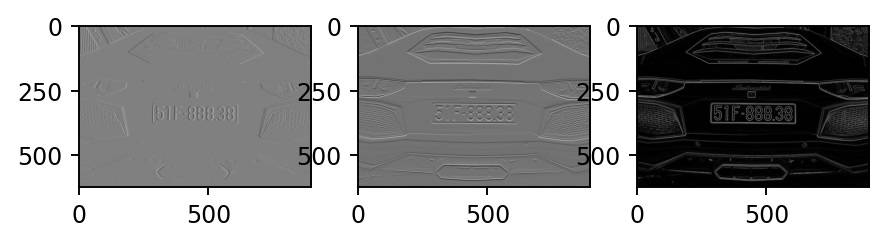

In [32]:
edge_blade = sobel_edge_detect(Image.open('./car1.jpg').convert('L'))
# plt.imshow(edge_blade, cmap='gray')

### 3) Erosion

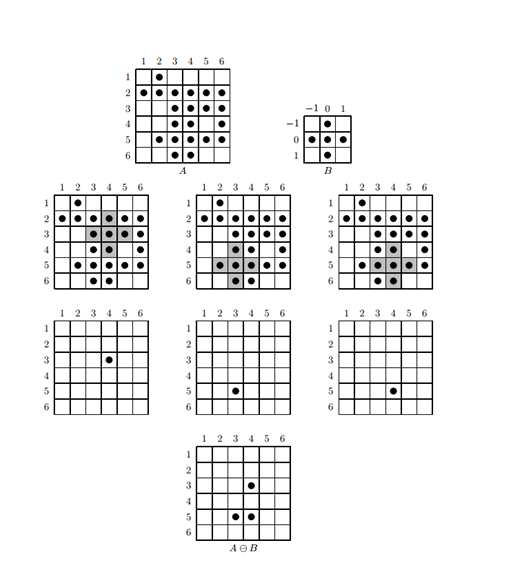

In [81]:
def eros_img(image, epoch=1):
    eros_filter = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    
    if epoch == 0:
        erosed = image
    else:
        erosed = erosion(image, eros_filter)
        for i in range(epoch-1):
            erosed = erosion(erosed, eros_filter)
            
    plt.figure(dpi=150)
    plt.subplot(121)
    plt.title('Origin')
    plt.imshow(image, cmap='gray')
    plt.subplot(122)
    plt.title('Erosed')
    plt.imshow(erosed, cmap='gray')
    
    return erosed

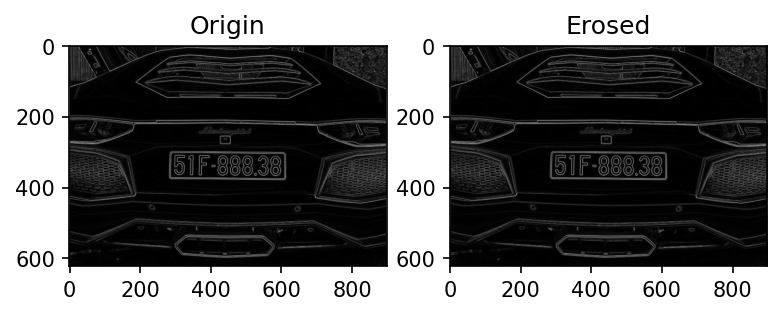

In [82]:
erosed = eros_img(edge_blade, 0)

### 4) Dilation

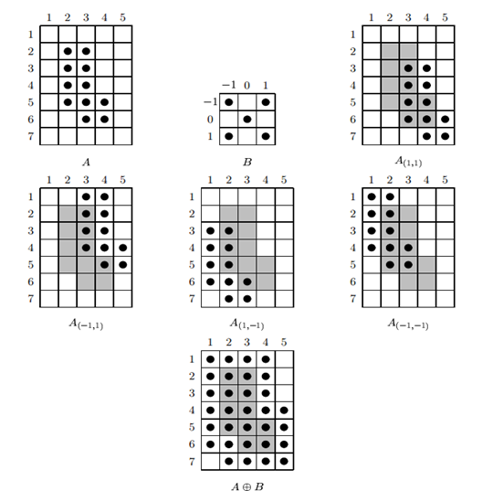

In [83]:
def dilate_img(image, epoch=1):
    dilation_filter = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    
    if epoch == 0:
        dilated_image = image
    else:
        dilated_image = dilation(edge_blade, dilation_filter)
        for i in range(epoch-1):
            dilated_image = dilation(dilated_image, dilation_filter)

    plt.figure(dpi=150)
    plt.subplot(121)
    plt.imshow(edge_blade, cmap='gray')
    plt.subplot(122)
    plt.imshow(dilated_image, cmap='gray')
    return dilated_image

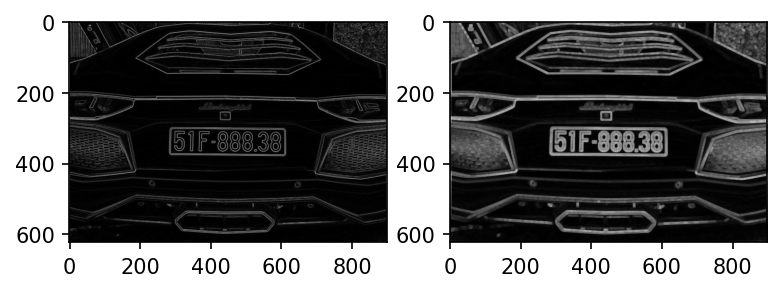

In [86]:
dilated_image = dilate_img(edge_blade, 2)